In [147]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import numpy as np 

%matplotlib inline

In [185]:
class Model(nn.Module):
    
    def __init__(self,in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()       

        self.layer1 = nn.Linear(in_features,h1)
        self.layer2 = nn.Linear(h1,h2)
        self.layer3 = nn.Linear(h2, out_features)

    def forward(self,x):
        hidden1_out = F.relu(self.layer1(x))
        hidden2_out = F.relu(self.layer2(hidden1_out))
        output = self.layer3(hidden2_out)
        
        return output 

In [240]:
torch.manual_seed(32)
model = Model()

In [187]:
url = 'https://raw.githubusercontent.com/iqbalamo93/Datasets/master/iris.csv'
import matplotlib.pyplot as plt
import seaborn as sns

In [188]:
df = pd.read_csv(url)

In [189]:
df['target'].value_counts()

0.0    50
1.0    50
2.0    50
Name: target, dtype: int64

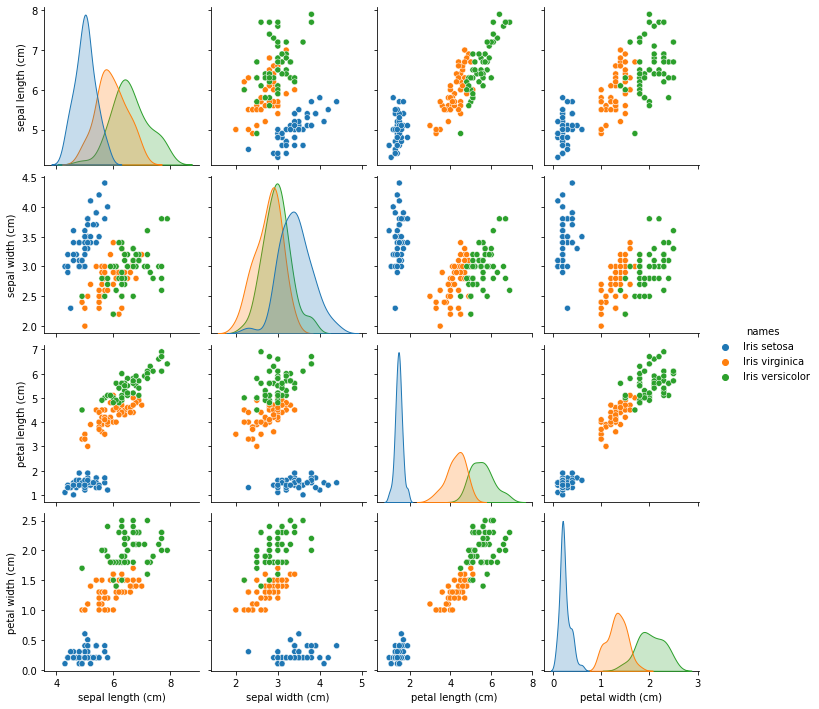

In [190]:
df_copy = df.copy()
mapper = {
    0:'Iris setosa',
    1:'Iris virginica',
    2:'Iris versicolor'
}
df_copy['names'] = df_copy['target'].map(mapper)
sns.pairplot(df_copy.loc[:,df_copy.columns!='target'], hue='names')

In [191]:
from sklearn.model_selection import train_test_split

In [192]:
X = df.drop('target',axis=1).values
y = df['target'].values

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [229]:
X_train, X_test = torch.FloatTensor(X_train), torch.FloatTensor(X_test)
y_train, y_test = torch.LongTensor(y_train), torch.LongTensor(y_test)

In [230]:
model.parameters

<bound method Module.parameters of Model(
  (layer1): Linear(in_features=4, out_features=8, bias=True)
  (layer2): Linear(in_features=8, out_features=9, bias=True)
  (layer3): Linear(in_features=9, out_features=3, bias=True)
)>

In [241]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [242]:
epochs = 150
losses = []

for i in range(epochs):
    
    y_pred = model.forward(X_train)
    
    loss = criterion(y_pred, y_train)
    losses.append(loss.detach().numpy())
    if i%10==0:
        print(f'Epoch {i} and loss is {loss:.8f}')
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch 0 and loss is 1.15071142
Epoch 10 and loss is 0.93773156
Epoch 20 and loss is 0.77982563
Epoch 30 and loss is 0.60994017
Epoch 40 and loss is 0.40079933
Epoch 50 and loss is 0.25436318
Epoch 60 and loss is 0.15053053
Epoch 70 and loss is 0.10086945
Epoch 80 and loss is 0.08128316
Epoch 90 and loss is 0.07231429
Epoch 100 and loss is 0.06713332
Epoch 110 and loss is 0.06355972
Epoch 120 and loss is 0.06085380
Epoch 130 and loss is 0.05870985
Epoch 140 and loss is 0.05695846


Text(0.5, 0, 'Epoch')

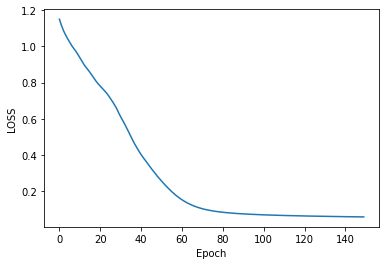

In [243]:
plt.plot(range(epochs),losses)
plt.ylabel('LOSS')
plt.xlabel('Epoch')

In [274]:
class Model(nn.Module):
    
    torch.manual_seed(32)
    
    def __init__(self,in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()       

        self.layer1 = nn.Linear(in_features,h1)
        self.layer2 = nn.Linear(h1,h2)
        self.layer3 = nn.Linear(h2, out_features)
        
        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = torch.optim.Adam(self.parameters(),lr=0.01)

    def forward(self,x):
        hidden1_out = F.relu(self.layer1(x))
        hidden2_out = F.relu(self.layer2(hidden1_out))
        output = self.layer3(hidden2_out)
        
        return output 
    
    def train(self,x,y,epochs=150):
        self.los = []
        self.test_loss = []
        for i in range(epochs):
    
            y_pred = self.forward(x)
            
            #calculating testing loss
            with torch.no_grad():
                y_eval = self.forward(X_test)
                loss_ = self.criterion(y_eval, y_test)
                self.test_loss.append(loss_.detach().numpy())
            #testing loss over
            
            loss = self.criterion(y_pred,y)
            self.los.append(loss.detach().numpy())
            if i%10==0:
                print(f'Epoch {i} and loss is {loss:.8f}')
            
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
    def plot_losse(self):
        plt.plot(range(epochs),self.los)
        plt.ylabel('LOSS')
        plt.xlabel('Epoch')

In [271]:
dum = Model()

Epoch 0 and loss is 1.15071142
Epoch 10 and loss is 0.93773156
Epoch 20 and loss is 0.77982563
Epoch 30 and loss is 0.60994017
Epoch 40 and loss is 0.40079933
Epoch 50 and loss is 0.25436318
Epoch 60 and loss is 0.15053053
Epoch 70 and loss is 0.10086945
Epoch 80 and loss is 0.08128316
Epoch 90 and loss is 0.07231429
Epoch 100 and loss is 0.06713332
Epoch 110 and loss is 0.06355972
Epoch 120 and loss is 0.06085380
Epoch 130 and loss is 0.05870985
Epoch 140 and loss is 0.05695846


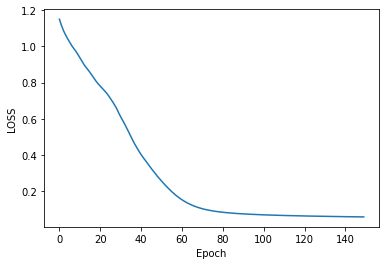

In [272]:
dum.train(X_train,y_train)
dum.plot_losse()

Text(0.5, 0, 'Epoch')

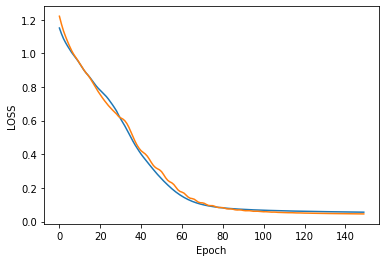

## Predicting...

In [251]:
with torch.no_grad():
    y_eval = dum.forward(X_test)
    loss = dum.criterion(y_eval, y_test)
print(loss)

tensor(0.0453)


In [247]:
loss

tensor(0.0453)

In [297]:
class Model(nn.Module):
    
    torch.manual_seed(32)
    epochs = 150
    def __init__(self,in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()       

        self.layer1 = nn.Linear(in_features,h1)
        self.layer2 = nn.Linear(h1,h2)
        self.layer3 = nn.Linear(h2, out_features)
        
        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = torch.optim.Adam(self.parameters(),lr=0.01)

    def forward(self,x):
        hidden1_out = F.relu(self.layer1(x))
        hidden2_out = F.relu(self.layer2(hidden1_out))
        output = self.layer3(hidden2_out)
        
        return output 
    
    def train(self,x,y,epochs=epochs):
        self.los = []
        self.test_loss = []
        for i in range(epochs):
    
            y_pred = self.forward(x)
            
            #calculating testing loss
            with torch.no_grad():
                y_eval = self.forward(X_test)
                loss_ = self.criterion(y_eval, y_test)
                self.test_loss.append(loss_.detach().numpy())
            #testing loss over
            
            loss = self.criterion(y_pred,y)
            self.los.append(loss.detach().numpy())
            if i%10==0:
                print(f'Epoch {i} and loss is {loss:.8f}')
            
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
    def plot_losse(self):
        plt.plot(range(self.epochs),self.los)
        plt.ylabel('LOSS')
        plt.xlabel('Epoch')

In [298]:
full_model =Model()

Epoch 0 and loss is 1.15071142
Epoch 10 and loss is 0.93773156
Epoch 20 and loss is 0.77982563
Epoch 30 and loss is 0.60994017
Epoch 40 and loss is 0.40079933
Epoch 50 and loss is 0.25436318
Epoch 60 and loss is 0.15053053
Epoch 70 and loss is 0.10086945
Epoch 80 and loss is 0.08128316
Epoch 90 and loss is 0.07231429
Epoch 100 and loss is 0.06713332
Epoch 110 and loss is 0.06355972
Epoch 120 and loss is 0.06085380
Epoch 130 and loss is 0.05870985
Epoch 140 and loss is 0.05695846


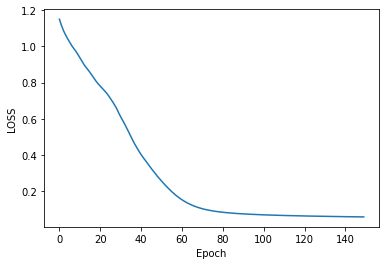

In [299]:
full_model.train(X_train,y_train)
full_model.plot_losse()

Text(0.5, 0, 'Epoch')

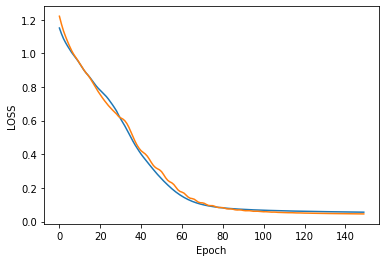

In [301]:
plt.plot(range(full_model.epochs),full_model.los)
plt.plot(range(full_model.epochs),full_model.test_loss)
plt.ylabel('LOSS')
plt.xlabel('Epoch')